**Name** : Poonam Raosaheb Wagh

**Roll No** : B1951020

**PRN** : 72018648L

**Class** : BE IT A

# Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 
%matplotlib inline

# Loading and preparing the data

In [2]:
#import dataset and split into train and test 
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

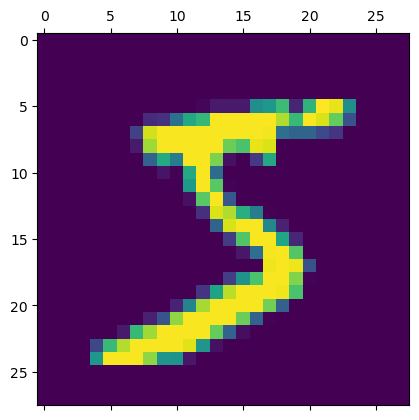

In [3]:
#to see how first image looks
plt.matshow(x_train[0])

In [6]:
  

x_train = x_train / 255
x_test = x_test / 255

# Creating the Model

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Compile the model

In [9]:
model.compile(optimizer = 'sgd',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Train the Model

In [10]:
history = model.fit(x_train,y_train,validation_data = (x_test,y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 0.6477 - accuracy: 0.8376 - val_loss: 0.3589 - val_accuracy: 0.9029
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3379 - accuracy: 0.9051 - val_loss: 0.2922 - val_accuracy: 0.9179
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2887 - accuracy: 0.9184 - val_loss: 0.2610 - val_accuracy: 0.9281
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2580 - accuracy: 0.9276 - val_loss: 0.2390 - val_accuracy: 0.9327
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2349 - accuracy: 0.9338 - val_loss: 0.2211 - val_accuracy: 0.9378
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2158 - accuracy: 0.9394 - val_loss: 0.2045 - val_accuracy: 0.9425
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1999 - accuracy: 0.9440 - val_loss: 0.1905 - val_accuracy

# Evaluate the Model

In [11]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Loss = %.3f" %test_loss)
print("Accuracy = %.3f" %test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1603 - accuracy: 0.9525
Loss = 0.160
Accuracy = 0.952


# Making Prediction on New Data

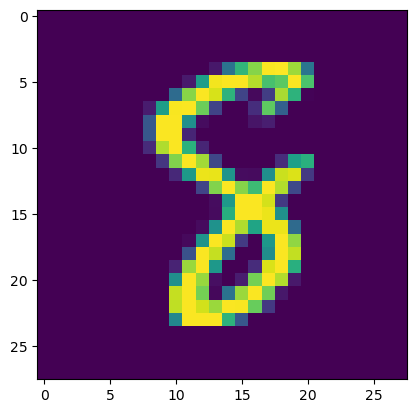

In [12]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

# Confusion Matrix

In [13]:
test_predict = model.predict(x_test)
#get classification labels
test_predict_labels = np.argmax(test_predict,axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = test_predict_labels)
print('Confusion Matrix of the Test Set :\n' , confusion_matrix)

313/313 [==============================] - 1s 2ms/step
Confusion Matrix of the Test Set :
 tf.Tensor(
[[ 963    0    0    1    0    5    6    3    2    0]
 [   0 1113    4    1    1    1    3    2   10    0]
 [   7    1  985    5    6    0    6   10   10    2]
 [   0    1   13  955    0   15    1   11   11    3]
 [   1    1    9    0  937    0    4    3    3   24]
 [   9    1    1   12    2  836   10    2   14    5]
 [  11    3    3    2    9    8  918    1    3    0]
 [   2    8   24    5    3    1    0  968    1   16]
 [   4    2    3   14    5   11   11    9  911    4]
 [   6    6    1    8   23    6    1   12    7  939]], shape=(10, 10), dtype=int32)
